下記は、marubatsul.py の 17 行目のコメントをなくして実行したものです

In [1]:
from util import gui_play

gui_play()

ImportError: cannot import name 'Marubatsu' from partially initialized module 'marubatsu' (most likely due to a circular import) (c:\Users\ys\ai\marubatsu\117\marubatsu.py)

下記のプログラムを実行する前に、marubatsu.py の 17 行目をコメントにして、JupyterLab を再起動しました

In [1]:
from marubatsu import Marubatsu_GUI
from tkinter import Tk, filedialog
import os

def __init__(self, mb, params, names, ai_dict, seed, size):
    if params is None:
        params = [{}, {}]
    if ai_dict is None:
        ai_dict = {}
    if names is None:
        names = [None, None]
    for i in range(2):
        if names[i] is None:
            if mb.ai[i] is None:
                names[i] = "人間"
            else:
                names[i] = mb.ai[i].__name__
    
    # JupyterLab からファイルダイアログを開く際に必要な前処理
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)  

    # save フォルダが存在しない場合は作成する
    if not os.path.exists("save"):
        os.mkdir("save")        
    
    self.mb = mb
    self.ai_dict = ai_dict
    self.params = params
    self.names = names
    self.seed = seed
    self.size = size
    
    super(Marubatsu_GUI, self).__init__()
    
    from tree import Mbtree, Mbtree_GUI

    if Marubatsu_GUI.mbtree is None:
        Marubatsu_GUI.mbtree = Mbtree.load("../data/aidata")
    self.mbtree_gui = Mbtree_GUI(Marubatsu_GUI.mbtree, size=0.1)
    
Marubatsu_GUI.__init__ = __init__

In [2]:
from util import gui_play

gui_play()

In [3]:
from marubatsu import Marubatsu
import matplotlib.patches as patches

@staticmethod
def draw_board(ax, mb, show_result=False, score=None, bc=None, bw=1, darkness=0, dx=0, dy=0, lw=2): 
    # 結果によってゲーム盤の背景色を変更する
    if show_result:
        if score is None and mb.status == Marubatsu.PLAYING:
            bgcolor = "white"
        elif score == 1 or mb.status == Marubatsu.CIRCLE:
            bgcolor = "lightcyan"
        elif score == -1 or mb.status == Marubatsu.CROSS:
            bgcolor = "lavenderblush"
        else:
            bgcolor = "lightyellow"
        rect = patches.Rectangle(xy=(dx, dy), width=mb.BOARD_SIZE,
                                height=mb.BOARD_SIZE, fc=bgcolor)
        ax.add_patch(rect)
  
    # ゲーム盤の枠を描画する
    for i in range(1, mb.BOARD_SIZE):
        ax.plot([dx, dx + mb.BOARD_SIZE], [dy + i, dy + i], c="k", lw=lw) # 横方向の枠線
        ax.plot([dx + i, dx + i], [dy, dy + mb.BOARD_SIZE], c="k", lw=lw) # 縦方向の枠線

    # ゲーム盤のマークを描画する
    for y in range(mb.BOARD_SIZE):
        for x in range(mb.BOARD_SIZE):
            color = "red" if (x, y) == mb.last_move else "black"
            Marubatsu_GUI.draw_mark(ax, dx + x, dy + y, mb.board[x][y], color, lw=lw)

    # darkness 0 より大きい場合は、半透明の黒い正方形を描画して暗くする
    if darkness > 0:
        ax.add_artist(patches.Rectangle(xy=(dx, dy), width=mb.BOARD_SIZE,
                                        height=mb.BOARD_SIZE, fc="black", alpha=darkness))

    # bc が None でない場合はその色で bw の太さで外枠を描画する
    if bc is not None:
        frame = patches.Rectangle(xy=(dx, dy), width=mb.BOARD_SIZE,
                                  height=mb.BOARD_SIZE, ec=bc, fill=False, lw=bw)
        ax.add_patch(frame)
        
Marubatsu_GUI.draw_board = draw_board

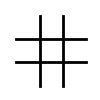

In [4]:
import matplotlib.pyplot as plt

mb = Marubatsu()
fig, ax = plt.subplots(figsize=(1,1))
ax.axis("off")
Marubatsu_GUI.draw_board(ax, mb)

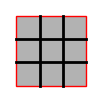

In [5]:
fig, ax = plt.subplots(figsize=(1,1))
ax.axis("off")
Marubatsu_GUI.draw_board(ax, mb, bc="red", darkness=0.3)

In [6]:
from tree import Node, Rect

def draw_node(self, ax=None, maxdepth=None, emphasize=False, darkness=0, size=0.25, lw=0.8, dx=0, dy=0):
    width = 8
    if ax is None:
        height = len(self.children) * 4
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")
        for childnode in self.children:
            childnode.height = 4
        self.height = height         
        
    # 自分自身のノードを真ん中の位置になるように (dx, dy) からずらして描画する
    y = dy + (self.height - 3) / 2
    bc = "red" if emphasize else None
    Marubatsu_GUI.draw_board(ax, self.mb, show_result=True, 
                            score=getattr(self, "score", None), bc=bc, darkness=darkness, lw=lw, dx=dx, dy=y)
    rect = Rect(dx, y, 3, 3)
    # 子ノードが存在する場合に、エッジの線と子ノードを描画する
    if len(self.children) > 0:
        if maxdepth != self.depth:   
            ax.plot([dx + 3.5, dx + 4], [y + 1.5, y + 1.5], c="k", lw=lw)
            prevy = None
            for childnode in self.children:
                childnodey = dy + (childnode.height - 3) / 2
                if maxdepth is None:
                    Marubatsu_GUI.draw_board(ax, childnode.mb, show_result=True,
                                            score=getattr(childnode, "score", None), dx=dx+5, dy=childnodey, lw=lw)
                edgey = childnodey + 1.5
                ax.plot([dx + 4 , dx + 4.5], [edgey, edgey], c="k", lw=lw)
                if prevy is not None:
                    ax.plot([dx + 4 , dx + 4], [prevy, edgey], c="k", lw=lw)
                prevy = edgey
                dy += childnode.height
        else:
            ax.plot([dx + 3.5, dx + 4.5], [y + 1.5, y + 1.5], c="k", lw=lw)
            
    return rect

Node.draw_node = draw_node

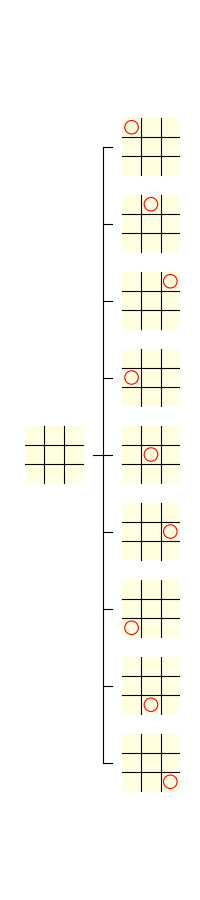

In [7]:
from tree import Mbtree

mbtree = Mbtree.load("../data/aidata")
mbtree.root.draw_node()

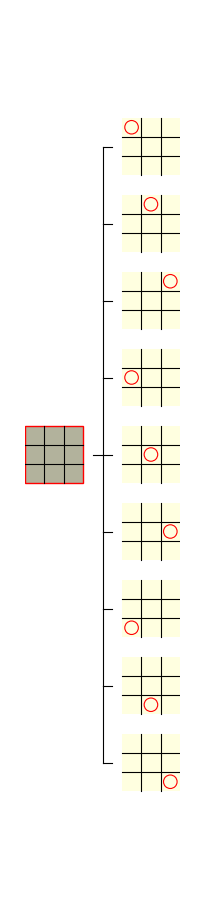

In [8]:
mbtree.root.draw_node(emphasize=True, darkness=0.3)

In [9]:
from tree import Mbtree_GUI

Mbtree_GUI(mbtree)

In [10]:
def draw_subtree(self, centernode=None, selectednode=None, anim_frame=None, isscore=False, ax=None, size=0.25, lw=0.8, maxdepth=2):
    def calc_darkness(node):
        if anim_frame is None:
            return 0
        index = node.score_index if isscore else node.id
        return 0.5 if index > anim_frame else 0
    
    self.nodes_by_rect = {}

    if centernode is None:
        centernode = self.root
    self.calc_node_height(N=centernode, maxdepth=maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                emphasize = node is selectednode
                darkness = calc_darkness(node)
                rect = node.draw_node(ax=ax, maxdepth=maxdepth, emphasize=emphasize, darkness=darkness, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = node
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                darkness = calc_darkness(sibling)
                rect = sibling.draw_node(ax, maxdepth=sibling.depth, size=size, darkness=darkness, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = sibling
            dy += sibling.height
        dx = 5 * parent.depth
        darkness = calc_darkness(parent)
        rect = parent.draw_node(ax, maxdepth=maxdepth, darkness=darkness, size=size, lw=lw, dx=dx, dy=0)
        self.nodes_by_rect[rect] = parent
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            darkness = calc_darkness(node)
            rect = node.draw_node(ax, maxdepth=node.depth, darkness=darkness, size=size, lw=lw, dx=dx, dy=0)
            self.nodes_by_rect[rect] = node
            
Mbtree.draw_subtree = draw_subtree

In [13]:
from tree import Mbtree_Anim

def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    self.selectednode = self.nodelist[self.play.value]
    self.centernode = self.selectednode
    if self.mbtree.algo == "bf":
        if self.centernode.depth > 0:
            self.centernode = self.centernode.parent
    while self.centernode.depth > 6:
        self.centernode = self.centernode.parent
    if self.centernode.depth <= 4:
        maxdepth = self.centernode.depth + 1
    elif self.centernode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    self.mbtree.draw_subtree(centernode=self.centernode, selectednode=self.selectednode,
                             anim_frame=self.play.value, isscore=self.isscore, ax=self.ax, maxdepth=maxdepth)
                            
    disabled = self.play.value == 0
    self.set_button_status(self.prev_button, disabled=disabled)
    disabled = self.play.value == self.nodenum - 1
    self.set_button_status(self.next_button, disabled=disabled)
    
Mbtree_Anim.update_gui = update_gui

In [16]:
Mbtree_Anim(mbtree)

In [17]:
bftree = Mbtree.load("../data/bftree")
Mbtree_Anim(bftree);

In [18]:
Mbtree_Anim(mbtree, isscore=True)

In [20]:
def draw_subtree(self, centernode=None, selectednode=None, anim_frame=None, isscore=False,
                 ax=None, show_bestmove=False, size=0.25, lw=0.8, maxdepth=2):
    def calc_darkness(node):
        if show_bestmove:
            if node.parent is None:
                return 0
            elif node.mb.last_move in node.parent.bestmoves:
                return 0
            else:
                return 0.2
            
        if anim_frame is None:
            return 0
        index = node.score_index if isscore else node.id
        return 0.5 if index > anim_frame else 0
    
    self.nodes_by_rect = {}

    if centernode is None:
        centernode = self.root
    self.calc_node_height(N=centernode, maxdepth=maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                emphasize = node is selectednode
                darkness = calc_darkness(node)
                rect = node.draw_node(ax=ax, maxdepth=maxdepth, emphasize=emphasize, darkness=darkness, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = node
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                darkness = calc_darkness(sibling)
                rect = sibling.draw_node(ax, maxdepth=sibling.depth, size=size, darkness=darkness, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = sibling
            dy += sibling.height
        dx = 5 * parent.depth
        darkness = calc_darkness(parent)
        rect = parent.draw_node(ax, maxdepth=maxdepth, darkness=darkness, size=size, lw=lw, dx=dx, dy=0)
        self.nodes_by_rect[rect] = parent
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            darkness = calc_darkness(node)
            rect = node.draw_node(ax, maxdepth=node.depth, darkness=darkness, size=size, lw=lw, dx=dx, dy=0)
            self.nodes_by_rect[rect] = node
            
Mbtree.draw_subtree = draw_subtree

In [24]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    if self.selectednode.depth <= 4:
        maxdepth = self.selectednode.depth + 1
    elif self.selectednode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    centernode = self.selectednode
    while centernode.depth > 6:
        centernode = centernode.parent
    self.mbtree.draw_subtree(centernode=centernode, selectednode=self.selectednode,
                             show_bestmove=True, ax=self.ax, maxdepth=maxdepth)
    
    disabled = self.selectednode.parent is None
    self.set_button_status(self.left_button, disabled=disabled)
    disabled = self.selectednode.depth >= 6 or len(self.selectednode.children) == 0
    self.set_button_status(self.right_button, disabled=disabled)
    disabled = self.selectednode.parent is None or self.selectednode.parent.children.index(self.selectednode) == 0
    self.set_button_status(self.up_button, disabled=disabled)
    disabled = self.selectednode.parent is None or self.selectednode.parent.children[-1] is self.selectednode
    self.set_button_status(self.down_button, disabled=disabled)
    
Mbtree_GUI.update_gui = update_gui

In [25]:
gui_play()

In [26]:
def draw_subtree(self, centernode=None, selectednode=None, anim_frame=None, isscore=False, ax=None, show_bestmove=False, size=0.25, lw=0.8, maxdepth=2):
    def calc_darkness(node):
        if show_bestmove:
            if node.parent is None:
                return 0
            elif node.mb.last_move in node.parent.bestmoves:
                return 0
            else:
                return 0.2
            
        if anim_frame is None:
            return 0
        index = node.score_index if isscore else node.id
        return 0.5 if index > anim_frame else 0
    
    self.nodes_by_rect = {}

    if centernode is None:
        centernode = self.root
    self.calc_node_height(N=centernode, maxdepth=maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                emphasize = node is selectednode
                darkness = calc_darkness(node)
                rect = node.draw_node(ax=ax, maxdepth=maxdepth, emphasize=emphasize, darkness=darkness, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = node
                if show_bestmove and depth == maxdepth:
                    bestnode = node
                    while len(bestnode.bestmoves) > 0:
                        bestmove = bestnode.bestmoves[0]
                        bestnode = bestnode.children_by_move[bestmove]
                        dx = 5 * bestnode.depth
                        bestnode.height = 4
                        rect = bestnode.draw_node(ax=ax, maxdepth=bestnode.depth, emphasize=emphasize, size=size, lw=lw, dx=dx, dy=dy)
                        self.nodes_by_rect[rect] = bestnode
                    
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                darkness = calc_darkness(sibling)
                rect = sibling.draw_node(ax, maxdepth=sibling.depth, size=size, darkness=darkness, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = sibling
            dy += sibling.height
        dx = 5 * parent.depth
        darkness = calc_darkness(parent)
        rect = parent.draw_node(ax, maxdepth=maxdepth, darkness=darkness, size=size, lw=lw, dx=dx, dy=0)
        self.nodes_by_rect[rect] = parent
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            darkness = calc_darkness(node)
            rect = node.draw_node(ax, maxdepth=node.depth, darkness=darkness, size=size, lw=lw, dx=dx, dy=0)
            self.nodes_by_rect[rect] = node
            
Mbtree.draw_subtree = draw_subtree

In [27]:
gui_play()

c:\Users\ys\ai\marubatsu\117\marubatsu.py:639: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig, self.ax = plt.subplots(figsize=[self.size, self.size])


In [28]:
def draw_subtree(self, centernode=None, selectednode=None, ax=None, anim_frame=None, isscore=False, show_bestmove=False, size=0.25, lw=0.8, maxdepth=2):
    def calc_darkness(node):
        if show_bestmove:
            if node.parent is None:
                return 0
            elif node.mb.last_move in node.parent.bestmoves:
                return 0
            else:
                return 0.2
            
        if anim_frame is None:
            return 0
        index = node.score_index if isscore else node.id
        return 0.5 if index > anim_frame else 0
    
    self.nodes_by_rect = {}

    if centernode is None:
        centernode = self.root
    self.calc_node_height(N=centernode, maxdepth=maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    if show_bestmove:
        bestx = 5 * maxdepth + 4
        bestwidth = 50 - bestx
        ax.add_artist(patches.Rectangle(xy=(bestx, 0), width=bestwidth,
                                        height=height, fc="lightgray"))
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                emphasize = node is selectednode
                darkness = calc_darkness(node)
                rect = node.draw_node(ax=ax, maxdepth=maxdepth, emphasize=emphasize, darkness=darkness, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = node
                if show_bestmove and depth == maxdepth:
                    bestnode = node
                    while len(bestnode.bestmoves) > 0:
                        bestmove = bestnode.bestmoves[0]
                        bestnode = bestnode.children_by_move[bestmove]
                        dx = 5 * bestnode.depth
                        bestnode.height = 4
                        rect = bestnode.draw_node(ax=ax, maxdepth=bestnode.depth, emphasize=emphasize, size=size, lw=lw, dx=dx, dy=dy)
                        self.nodes_by_rect[rect] = bestnode                                          
                    
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                darkness = calc_darkness(sibling)
                rect = sibling.draw_node(ax, maxdepth=sibling.depth, size=size, darkness=darkness, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = sibling
            dy += sibling.height
        dx = 5 * parent.depth
        darkness = calc_darkness(parent)
        rect = parent.draw_node(ax, maxdepth=maxdepth, darkness=darkness, size=size, lw=lw, dx=dx, dy=0)
        self.nodes_by_rect[rect] = parent
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            darkness = calc_darkness(node)
            rect = node.draw_node(ax, maxdepth=node.depth, darkness=darkness, size=size, lw=lw, dx=dx, dy=0)
            self.nodes_by_rect[rect] = node
            
Mbtree.draw_subtree = draw_subtree

In [29]:
gui_play()

In [31]:
import ipywidgets as widgets 

def create_widgets(self):
    # 乱数の種の Checkbox と IntText を作成する
    self.checkbox = widgets.Checkbox(value=self.seed is not None, description="乱数の種",
                                    indent=False, layout=widgets.Layout(width="100px"))
    self.inttext = widgets.IntText(value=0 if self.seed is None else self.seed,
                                layout=widgets.Layout(width="80px"))   

    # 読み書き、ヘルプのボタンを作成する
    self.load_button = self.create_button("開く", 50)
    self.save_button = self.create_button("保存", 50)
    self.show_tree_button = self.create_button("木", 34)
    self.reset_tree_button = self.create_button("リ", 34)
    self.help_button = self.create_button("？", 34)
    
    # AI を選択する Dropdown を作成する
    self.create_dropdown()
    # 変更、リセット、待ったボタンを作成する
    self.change_button = self.create_button("変更", 50)
    self.reset_button = self.create_button("リセット", 80)
    self.undo_button = self.create_button("待った", 60)    
    
    # リプレイのボタンとスライダーを作成する
    self.first_button = self.create_button("<<", 50)
    self.prev_button = self.create_button("<", 50)
    self.next_button = self.create_button(">", 50)
    self.last_button = self.create_button(">>", 50)     
    self.slider = widgets.IntSlider(layout=widgets.Layout(width="200px"))
    # ゲーム盤の画像を表す figure を作成する
    self.create_figure()

    # print による文字列を表示する Output を作成する
    self.output = widgets.Output()  
    
    # ヘルプを表示する Output を作成し、表示の設定を行う
    self.help = widgets.Output()
    self.print_helpmessage()
    self.help.layout.display = "none"
    
Marubatsu_GUI.create_widgets = create_widgets

In [32]:
def print_helpmessage(self):
    with self.help:
        print("""操作説明

    マスの上でクリックすることで着手を行う。
    下記の GUI で操作を行うことができる。
    ()が記載されているものは、キー入力で同じ操作を行うことができることを意味する。
    なお、キー入力の操作は、ゲーム盤をクリックして選択状態にする必要がある。

    乱数の種\tチェックボックスを ON にすると、右のテキストボックスの乱数の種が適用される
    開く(-,L)\tファイルから対戦データを読み込む
    保存(+,S)\tファイルに対戦データを保存する
    木\t下部の GUI の部分木を表示の有無を切り替える
    リ\r株の GUI の部分木の中心となるノードを、現在の局面にリセットする
    ？(*,H)\t\tこの操作説明を表示する
    手番の担当\tメニューからそれぞれの手番の担当を選択する
    \t\tメニューから選択しただけでは担当は変更されず、変更またはリセットボタンによって担当が変更される
    変更\t\tゲームの途中で手番の担当を変更する
    リセット\t手番の担当を変更してゲームをリセットする
    待った(0)\t1つ前の自分の着手をキャンセルする
    <<(↑)\t\t最初の局面に移動する
    <(←)\t\t1手前の局面に移動する
    >(→)\t\t1手後の局面に移動する
    >>(↓)\t\t最後の着手が行われた局面に移動する
    スライダー\t現在の手数を表す。ドラッグすることで任意の手数へ移動する

    手数を移動した場合に、最後の着手が行われた局面でなければ、リプレイモードになる。
    リプレイモード中に着手を行うと、リプレイモードが解除され、その着手が最後の着手になる。""")
        
Marubatsu_GUI.print_helpmessage = print_helpmessage

In [33]:
def display_widgets(self):
    # 乱数の種のウィジェット、読み書き、ヘルプのボタンを横に配置した HBox を作成する
    hbox1 = widgets.HBox([self.checkbox, self.inttext, self.load_button, self.save_button,
                        self.show_tree_button, self.reset_tree_button, self.help_button])
    # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
    hbox2 = widgets.HBox([self.dropdown_list[0], self.dropdown_list[1], self.change_button, self.reset_button, self.undo_button])
    # リプレイ機能のボタンを横に配置した HBox を作成する
    hbox3 = widgets.HBox([self.first_button, self.prev_button, self.next_button, self.last_button, self.slider]) 
    # hbox1 ~ hbox3、Figure、Output を縦に配置した VBox を作成し、表示する
    display(widgets.VBox([hbox1, hbox2, hbox3, self.fig.canvas, self.output, self.help]))
    
Marubatsu_GUI.display_widgets = display_widgets 

In [34]:
import math

def create_event_handler(self):
    # 乱数の種のチェックボックスのイベントハンドラを定義する
    def on_checkbox_changed(changed):
        self.update_widgets_status()
        
    self.checkbox.observe(on_checkbox_changed, names="value")

    # 開く、保存ボタンのイベントハンドラを定義する
    def on_load_button_clicked(b=None):
        path = filedialog.askopenfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                        initialdir="save")
        if path != "":
            with open(path, "rb") as f:
                data = pickle.load(f)
                self.mb.records = data["records"]
                self.mb.ai = data["ai"]
                self.params = data["params"] if "params" in data else [ {}, {} ]
                if "names" in data:
                    names = data["names"]
                else:
                    names = [ "人間" if mb.ai[i] is None else mb.ai[i].__name__ for i in range(2)]                       
                options = self.dropdown_list[0].options.copy()
                for i in range(2):
                    value = (self.mb.ai[i], self.params[i]) 
                    if not value in options.values():
                        options[names[i]] = value
                for i in range(2):
                    self.dropdown_list[i].options = options
                    self.dropdown_list[i].value = (self.mb.ai[i], self.params[i])            
                change_step(data["move_count"])
                if data["seed"] is not None:                   
                    self.checkbox.value = True
                    self.inttext.value = data["seed"]
                else:
                    self.checkbox.value = False
                    
    def on_save_button_clicked(b=None):
        names = [ self.dropdown_list[i].label for i in range(2) ]     
        timestr = datetime.now().strftime("%Y年%m月%d日 %H時%M分%S秒")
        fname = f"{names[0]} VS {names[1]} {timestr}"
        path = filedialog.asksaveasfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                            initialdir="save", initialfile=fname,
                                            defaultextension="mbsav")
        if path != "":
            with open(path, "wb") as f:
                data = {
                    "records": self.mb.records,
                    "move_count": self.mb.move_count,
                    "ai": self.mb.ai,
                    "params": self.params,
                    "names": names,
                    "seed": self.inttext.value if self.checkbox.value else None
                }
                pickle.dump(data, f)
                
    def on_show_tree_button_clicked(b=None):
        self.mbtree_gui.vbox.layout.display = "none" if self.mbtree_gui.vbox.layout.display is None else None
        
    def on_reset_tree_button_clicked(b=None):
        self.update_gui()
                
    def on_help_button_clicked(b=None):
        self.help.layout.display = "none" if self.help.layout.display is None else None
    
    self.load_button.on_click(on_load_button_clicked)
    self.save_button.on_click(on_save_button_clicked)
    self.show_tree_button.on_click(on_show_tree_button_clicked)
    self.reset_tree_button.on_click(on_reset_tree_button_clicked)
    self.help_button.on_click(on_help_button_clicked)
    
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i], self.params[i] = self.dropdown_list[i].value
        self.mb.play_loop(self, self.params)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        # 乱数の種のチェックボックスが ON の場合に、乱数の種の処理を行う
        if self.checkbox.value:
            random.seed(self.inttext.value)
        self.mb.restart()
        self.output.clear_output()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.update_gui()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.update_gui()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        if self.mb.move_count != changed["new"]:
            change_step(changed["new"])
        
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            with self.output:
                self.mb.move(x, y)                
            # 次の手番の処理を行うメソッドを呼び出す
                self.mb.play_loop(self, self.params)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
            "-": on_load_button_clicked,            
            "l": on_load_button_clicked,            
            "+": on_save_button_clicked,            
            "s": on_save_button_clicked,            
            "*": on_help_button_clicked,            
            "h": on_help_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                event.inaxes = True
                event.xdata = num % 3
                event.ydata = 2 - (num // 3)
                on_mouse_down(event)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)             
        
Marubatsu_GUI.create_event_handler = create_event_handler     

In [35]:
gui_play()

In [38]:
def create_widgets(self):
    self.output = widgets.Output()  
    self.print_helpmessage()
    self.output.layout.display = "none"
    self.left_button = self.create_button("←", 50)
    self.up_button = self.create_button("↑", 50)
    self.right_button = self.create_button("→", 50)
    self.down_button = self.create_button("↓", 50)
    self.help_button = self.create_button("？", 50)
    self.label = widgets.Label(value="", layout=widgets.Layout(width=f"50px"))
    
    with plt.ioff():
        self.fig = plt.figure(figsize=[self.width * self.size,
                                        self.height * self.size])
        self.ax = self.fig.add_axes([0, 0, 1, 1])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False   
    
Mbtree_GUI.create_widgets = create_widgets

def print_helpmessage(self):
    with self.output:
        print("""操作説明

    下記のキーとボタンで中心となるノードを移動できる。
    ←、0 キー：親ノードへ移動
    ↑：一つ前の兄弟ノードへ移動
    ↓：一つ後の兄弟ノードへ移動
    →：先頭の子ノードへ移動

    テンキーで、対応するマスに着手が行われた子ノードへ移動する
    ノードの上でマウスを押すことでそのノードへ移動する
    背景が灰色になっている部分のノードは、最善手を着手し続けた場合のノードを表す
    """)
        
Mbtree_GUI.print_helpmessage = print_helpmessage

def create_event_handler(self):   
    def on_left_button_clicked(b=None):
        if self.selectednode.parent is not None:
            self.selectednode = self.selectednode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if len(self.selectednode.children) > 0:
            self.selectednode = self.selectednode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.selectednode.parent is not None:
            index = self.selectednode.parent.children.index(self.selectednode)
            if index > 0:
                self.selectednode = self.selectednode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.selectednode.parent is not None:
            index = self.selectednode.parent.children.index(self.selectednode)
            if self.selectednode.parent.children[-1] is not self.selectednode:
                self.selectednode = self.selectednode.parent.children[index + 1]
                self.update_gui()            
                
    def on_help_button_clicked(b=None):
        self.output.layout.display = "none" if self.output.layout.display is None else None
                        
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)
    self.help_button.on_click(on_help_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "0": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                move = (x, y)
                if move in self.selectednode.children_by_move:
                    self.selectednode = self.selectednode.children_by_move[move]
                    self.update_gui()
            except:
                pass            
            
    def on_mouse_down(event):
        for rect, node in self.mbtree.nodes_by_rect.items():
            if rect.is_inside(event.xdata, event.ydata):
                self.selectednode = node
                self.update_gui()
                break               
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)  

Mbtree_GUI.create_event_handler = create_event_handler

In [39]:
gui_play()